In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))



In [6]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [7]:
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df.shape

(9134, 24)

In [9]:
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)

In [10]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,0,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,1,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,0,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,0,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# Exploratory Data Analysis(EDA):

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int64  
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [13]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [14]:
df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Response Rate:

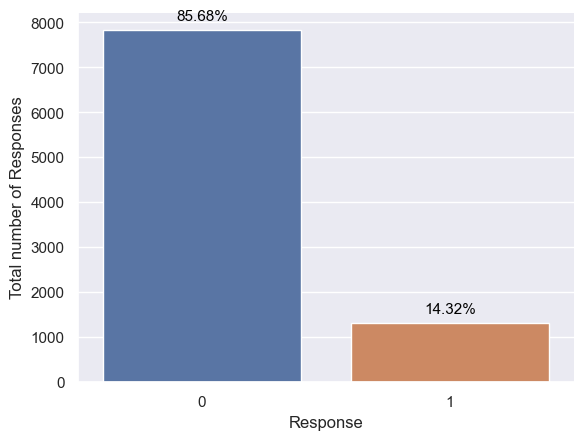

In [16]:
ax = sns.countplot(x='Response', data=df)  
plt.ylabel('Total number of Responses')
if 'annot_plot' in globals():
    annot_plot(ax, 0.08, 1)
plt.show()

Notice that about 14% customers have responded to marketing calls, and the remaining 86% of the customers have not responded.

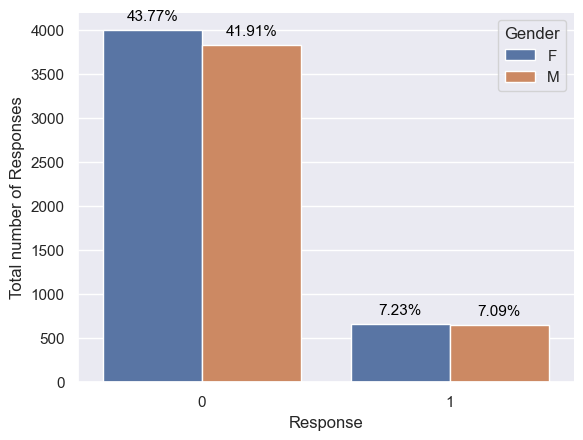

In [19]:
ax = sns.countplot(x='Response', hue='Gender', data=df)

plt.ylabel('Total number of Responses')

if 'annot_plot' in globals():
    annot_plot(ax, 0.08, 1)
plt.show()

Notice that, ratio of male and female for responding to a marketing call is almost same.

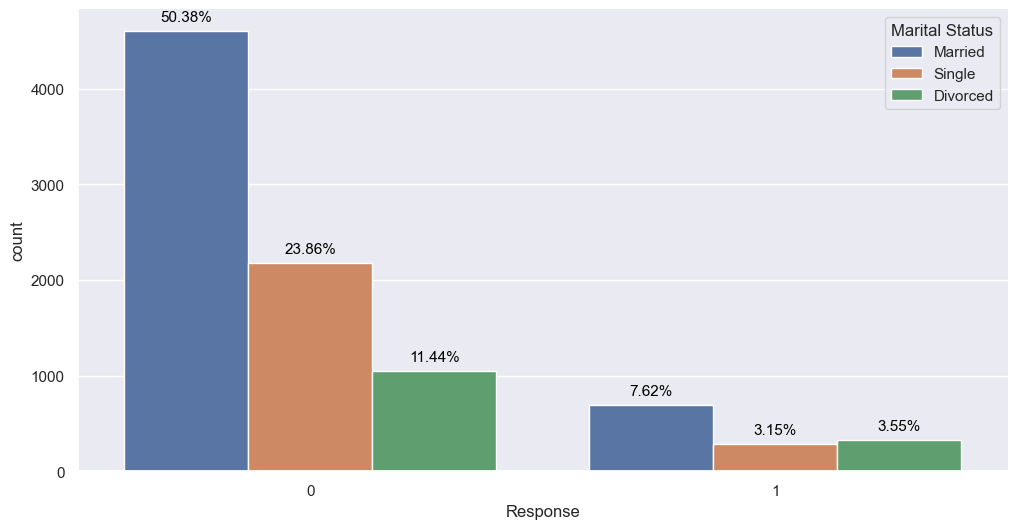

In [20]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Response', hue = df['Marital Status'], data = df)
annot_plot(ax,0.08,1)
plt.show()

Notice that out of 14% customers, 8% customers those who rsponded to marketing calls are from married category.

# Response rate by renew offer

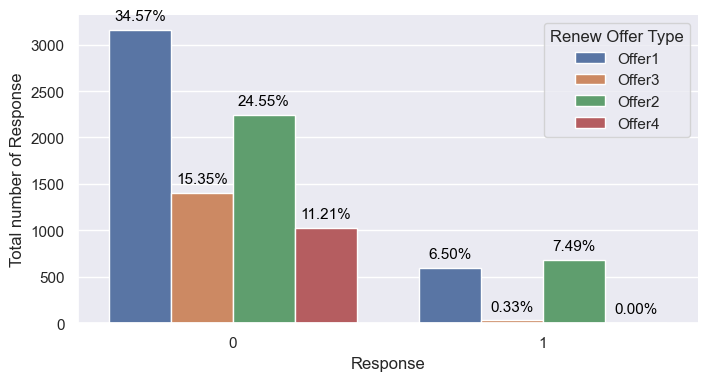

In [22]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Response',hue = 'Renew Offer Type' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

For offer1 and offer2 customers have responded to marketing calls,but for offer3 and offer4 almost nobody responded.

# Response rate by Education

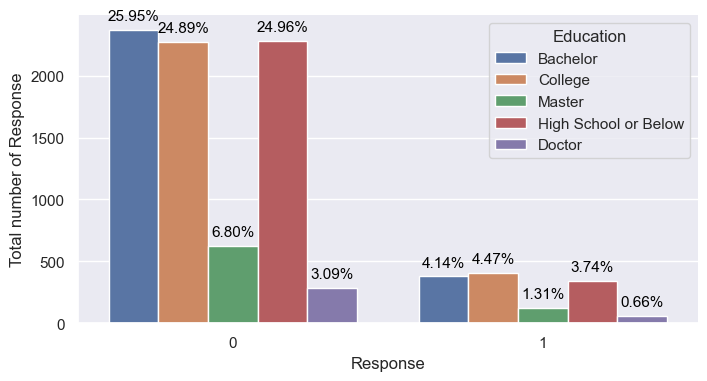

In [23]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Response',hue = 'Education' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Notice that customers with Doctor and master degree are very less who responded to marketing calls, may be they are not intersted or busy. or we can say young people are most likely to respond to marketing calls.

# Response rate by Sales Channel

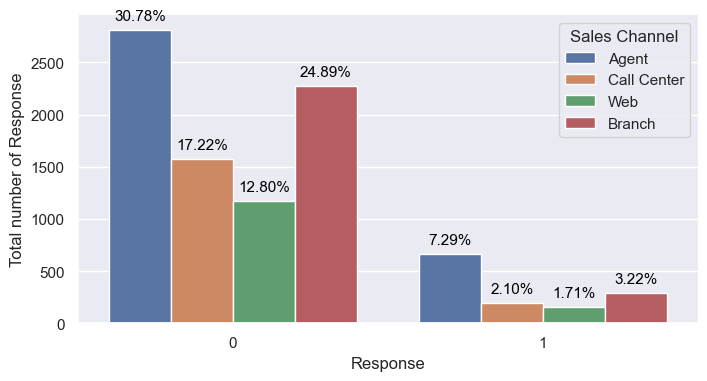

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x= 'Response',hue = 'Sales Channel' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# Response rate by Total Claim Amount:

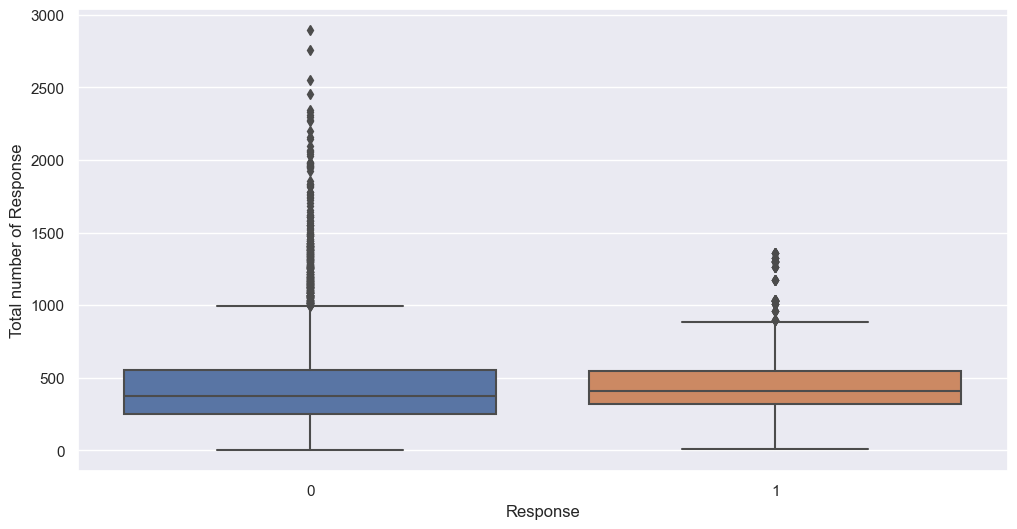

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Total Claim Amount' , x = 'Response', data = df)
plt.ylabel('Total number of Response')
plt.show()



Box plots are a great way to visualize the distribuation of countinous variables. They show the min, max, first quatile, meadian and third quartile, all in one view. The central rectangle spans from the first quartile to the third quartile, and the green line shows the median. The lower and upper ends show the minimum and the maximum of each distribution.

The dots above the upper boundry line show the suspected outliers that are decided based on the INterquartile range (IQR). The points that fall 1.5*IQR above the third quartile or 1.5*IQR below the quartile are suspected outliers and are drawn with the dots.



# Response rate by Income Distributions


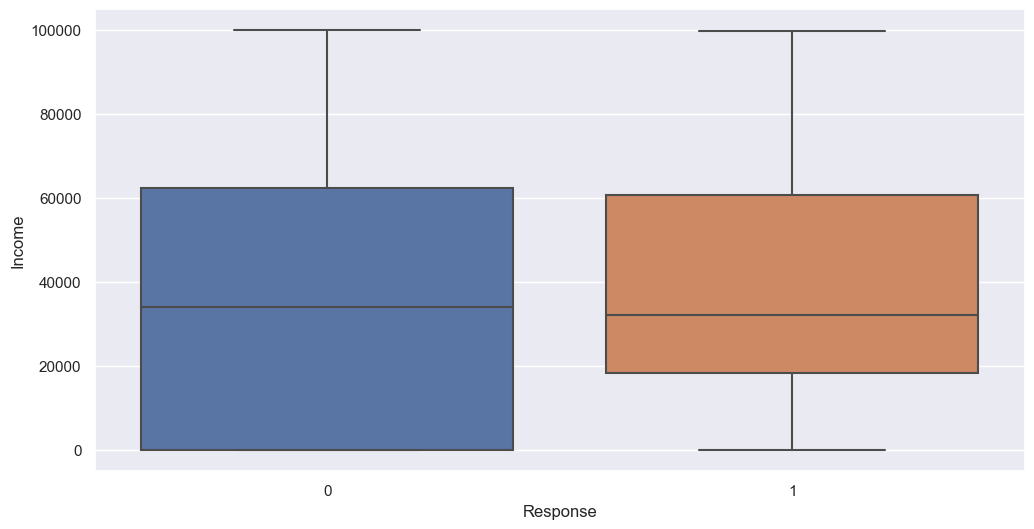

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'Income' , x = 'Response', data = df)
plt.show()


# Response rate by EmploymentStatus


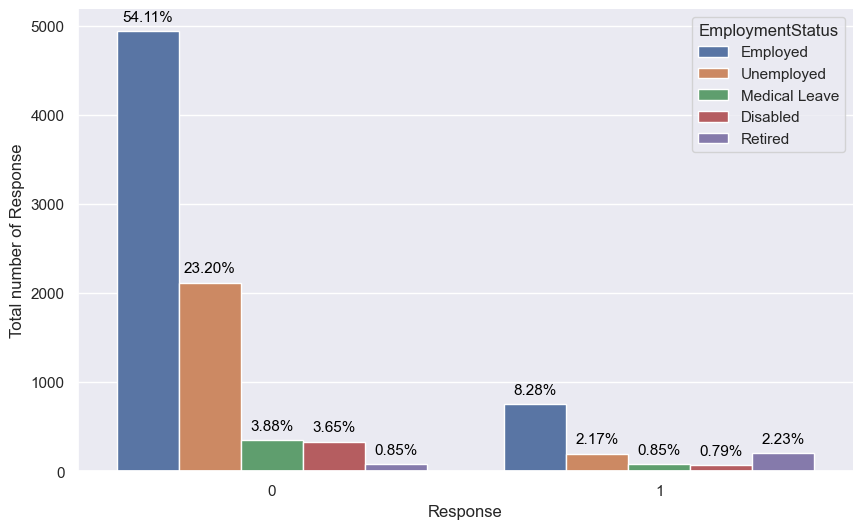

In [28]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Response',hue = 'EmploymentStatus' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

# Response rate by Vehicle Class:


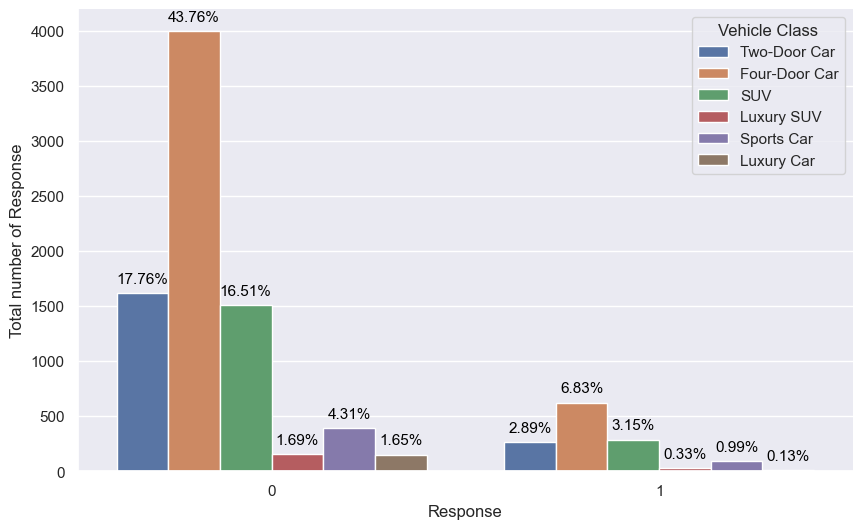

In [30]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Response',hue = 'Vehicle Class' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()


# Response rate by Policy:


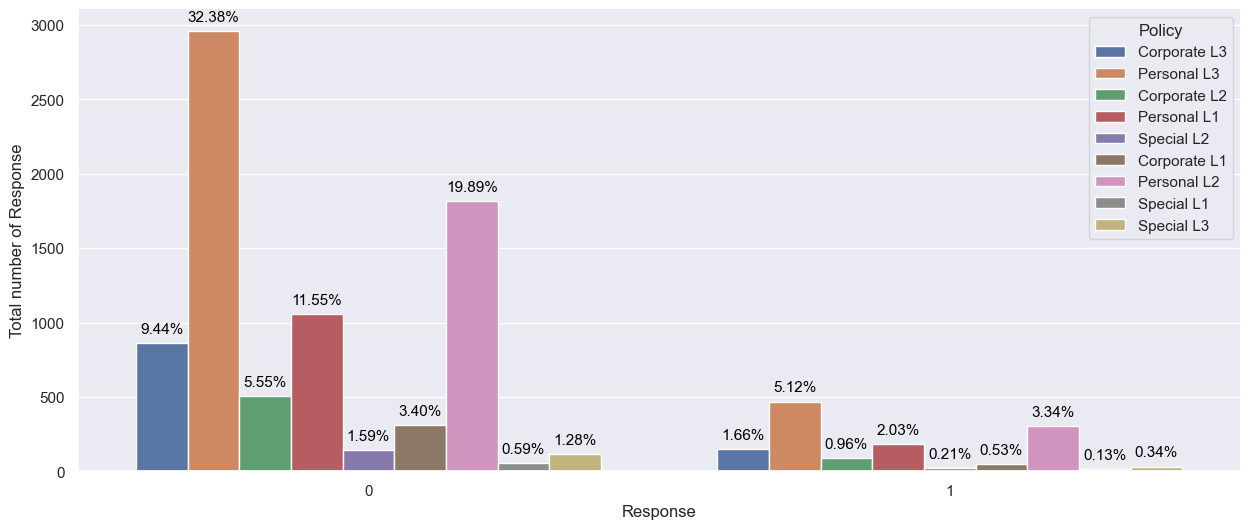

In [32]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x= 'Response',hue = 'Policy' ,data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()


# Regression Analysis with Continuous Variables Only

In [33]:
import statsmodels.api as sm

In [34]:
continous_var_df = df.select_dtypes(include=['int64','float'])
continous_var_df.nunique()

Customer Lifetime Value          8041
Response                            2
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
dtype: int64

In [35]:
continous_var_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [36]:
continous_var_reg = sm.Logit(continous_var_df['Response'], continous_var_df.drop('Response', axis = 1))
continous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                -0.02546
Time:                        19:41:17   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

By looking at the p-value of 'Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.

What Are P Values?

P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

High P values: your data are likely with a true null.

Low P values: your data are unlikely with a true null

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

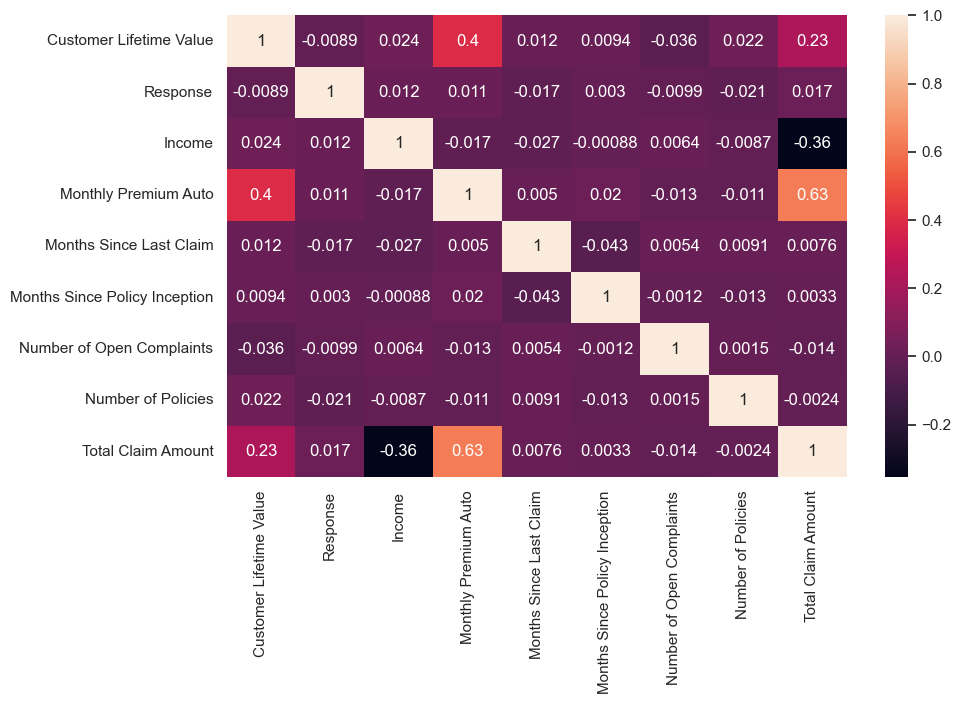

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(continous_var_df.corr(), annot = True)
plt.show()

# Regression Analysis with Categorical Variables

In [38]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer','Effective To Date'], axis = 1)

In [39]:
cat_df.nunique()

State               5
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy Type         3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
Vehicle Size        3
dtype: int64

# Conversion of Categorical data

In [40]:
cat_df.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [41]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [43]:
cat_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,1,1,0,2,1,3,0,0,0,1


In [44]:
categorical_train = sm.Logit(continous_var_df.Response, cat_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.387557
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9121
Method:                           MLE   Df Model:                           12
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.05642
Time:                        19:43:20   Log-Likelihood:                -3539.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.224e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0256      0.023     -1.122      0.262      -0.070       0.019
Coverage            -0.0639      0.046     -1.390      0.164      -0.154       0.026
Education            0.0088      0.022      0.409      0.683      -0.033       0.051
EmploymentStatus    -0.0459      0.024     -1.951      0.051      -0.092       0.000
Gender               0.0466      0.060      0.774      0.439      -0.071       0.165
Location Code       -0.0477      0.047     -1.014      0.311      -0.140       0.045
Marital Status      -0.4643      0.047     -9.816      0.000      -0.557      -0.372
Policy Type          0.1736      0.132      1.311      0.190      -0.086       0.433
Policy              -0.0751      0.037     -2.033      0.042      -0.147      -0.003
Renew Offer Type    -0.5681      0.037    -15.226      0.000      -0.641      -0.495
Sales Channel       -0.2150      0.030     -7.148      0.000      -0.274      -0.156
Vehicle Class        0.0201      0.015      1.381      0.167      -0.008       0.049
Vehicle Size        -0.3355      0.052     -6.398      0.000      -0.438      -0.233
====================================================================================
"""

By looking at p-value,'Marital Status','Renew Offer type','Sales channel','Vehicle size','policy' variables are significant at 0.05 significance level, and all of them have negative relationship with the output variable, Response.

# Regression Analysis with bith Continous and Categorical Variables.

In [45]:
continous_var_df.reset_index(drop = True, inplace=True)
cat_df.reset_index(drop = True, inplace=True)
all_data_df = pd.concat([continous_var_df,cat_df], axis = 1)
all_data_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,0,56274,69,32,5,0,1,384.811147,4,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,0,94,13,42,0,8,1131.464935,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,0,48767,108,18,38,0,2,566.472247,2,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,0,106,18,65,0,7,529.881344,1,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,0,43836,73,12,44,0,1,138.130879,4,...,1,1,0,2,1,3,0,0,0,1


In [46]:
total_train = sm.Logit(all_data_df.Response, all_data_df.drop(['Response'], axis = 1))
total_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.384709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9113
Method:                           MLE   Df Model:                           20
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.06336
Time:                        19:44:19   Log-Likelihood:                -3513.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 4.066e-88
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.183e-05   5.11e-06     -2.317      0.021   -2.18e-05   -1.82e-06
Income                         3.347e-06   1.39e-06      2.411      0.016    6.26e-07    6.07e-06
Monthly Premium Auto             -0.0033      0.001     -2.471      0.013      -0.006      -0.001
Months Since Last Claim          -0.0053      0.003     -1.780      0.075      -0.011       0.001
Months Since Policy Inception    -0.0019      0.001     -1.830      0.067      -0.004       0.000
Number of Open Complaints        -0.0569      0.035     -1.622      0.105      -0.126       0.012
Number of Policies               -0.0392      0.013     -3.013      0.003      -0.065      -0.014
Total Claim Amount                0.0007      0.000      4.448      0.000       0.000       0.001
State                            -0.0084      0.023     -0.357      0.721      -0.054       0.038
Coverage                         -0.0325      0.053     -0.615      0.538      -0.136       0.071
Education                         0.0235      0.022      1.068      0.285      -0.020       0.067
EmploymentStatus                 -0.0232      0.030     -0.763      0.445      -0.083       0.036
Gender                            0.0584      0.061      0.950      0.342      -0.062       0.179
Location Code                    -0.0894      0.053     -1.696      0.090      -0.193       0.014
Marital Status                   -0.4645      0.048     -9.585      0.000      -0.559      -0.370
Policy Type                       0.1085      0.135      0.806      0.420      -0.155       0.372
Policy                           -0.0335      0.039     -0.864      0.388      -0.110       0.043
Renew Offer Type                 -0.5828      0.039    -15.136      0.000      -0.658      -0.507
Sales Channel                    -0.1937      0.030     -6.354      0.000      -0.253      -0.134
Vehicle Class                     0.0287      0.015      1.897      0.058      -0.001       0.058
Vehicle Size                     -0.2837      0.055     -5.161      0.000      -0.391      -0.176
=================================================================================================
"""

By looking at the p-value of 'Customer lifetime value','Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Policies','Total claim amount','Marital Status','Renew offer type','Sales Channel','Vehicle size', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable.

Conclusion: The higher the Customer Lifetime value is, the less likely that the customer will be response to marketing calls.

# Regression Analysis with excluding Non-significant variables

In [47]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [48]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.385476
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.06149
Time:                        19:45:10   Log-Likelihood:                -3520.9
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                 7.814e-93
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.129e-05   5.09e-06     -2.217      0.027   -2.13e-05   -1.31e-06
Income                         3.549e-06   1.11e-06      3.192      0.001    1.37e-06    5.73e-06
Monthly Premium Auto             -0.0033      0.001     -2.762      0.006      -0.006      -0.001
Months Since Last Claim          -0.0062      0.003     -2.102      0.036      -0.012      -0.000
Months Since Policy Inception    -0.0023      0.001     -2.238      0.025      -0.004      -0.000
Number of Policies               -0.0414      0.013     -3.226      0.001      -0.067      -0.016
Total Claim Amount                0.0006      0.000      4.148      0.000       0.000       0.001
Marital Status                   -0.4794      0.045    -10.664      0.000      -0.567      -0.391
Renew Offer Type                 -0.5793      0.038    -15.268      0.000      -0.654      -0.505
Sales Channel                    -0.1981      0.030     -6.539      0.000      -0.257      -0.139
Vehicle Size                     -0.3031      0.053     -5.690      0.000      -0.407      -0.199
=================================================================================================
"""

# Classification:

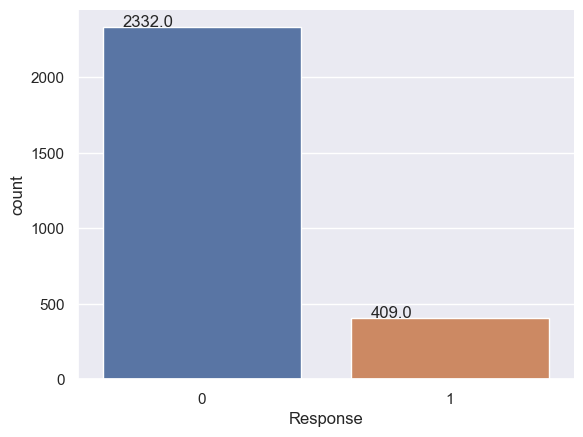

In [57]:


y = all_data_df['Response']
X = all_data_df.drop('Response', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


ax = sns.countplot(x=y_test)  


if 'annot_plot_num' in globals():
    annot_plot_num(ax, 0.08, 1)

plt.show()

# SVC Classification

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


svc = SVC()
svc.fit(X_train, y_train)


svc_pred = svc.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(svc_pred,y_test))  
print("Accuracy Score:", accuracy_score(svc_pred, y_test)) 
print("Classification Report:\n", classification_report(svc_pred, y_test)) 


cross_val_score_svc = cross_validate(svc, X_train, y_train, cv=5, return_train_score=True)
print("Cross-validation Train Score:", cross_val_score_svc['train_score'].mean())  
print("Cross-validation Test Score:", cross_val_score_svc['test_score'].mean()) 

Confusion Matrix:
 [[2332  409]
 [   0    0]]
Accuracy Score: 0.8507843852608536
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      2741
           1       0.00      0.00      0.00         0

    accuracy                           0.85      2741
   macro avg       0.50      0.43      0.46      2741
weighted avg       1.00      0.85      0.92      2741

Cross-validation Train Score: 0.8593774473767409
Cross-validation Test Score: 0.85937749684625


# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_validate


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred)) 
print("Accuracy Score:", accuracy_score(y_test, rfc_pred)) 
print("Classification Report:\n", classification_report(y_test, rfc_pred)) 

cross_val_score_rfc = cross_validate(rfc, X_train, y_train, cv=5, return_train_score=True)

print("Cross-validation Train Score:", cross_val_score_rfc['train_score'].mean())
print("Cross-validation Test Score:", cross_val_score_rfc['test_score'].mean())

Confusion Matrix:
 [[2328    4]
 [   9  400]]
Accuracy Score: 0.9952572053994893
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2332
           1       0.99      0.98      0.98       409

    accuracy                           1.00      2741
   macro avg       0.99      0.99      0.99      2741
weighted avg       1.00      1.00      1.00      2741

Cross-validation Train Score: 1.0
Cross-validation Test Score: 0.9892073839964468


# Feature Importance

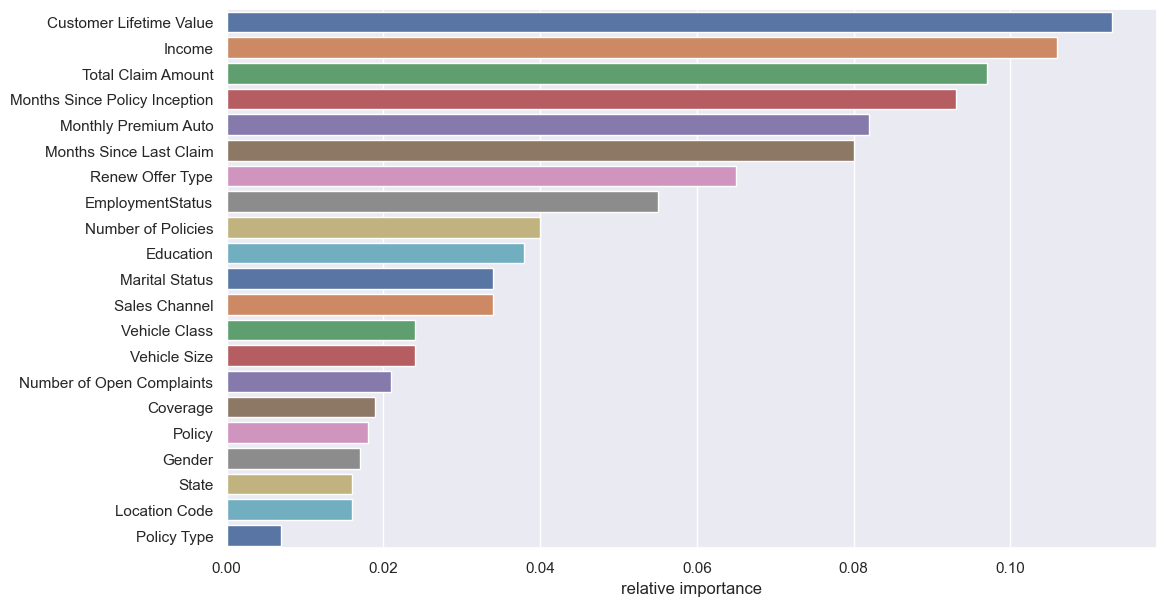

In [63]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()